# Logistic regression
Another strong baseline to evaluate is logistic regression

- Evaluate a logistic regression model (without any hyperparameters tuning)
- Tune its regularization strength parameter with cross-validated grid-search and compare the accuracy to the untuned one
- Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

Finally, vary the regularization strength of your estimator. What is the effect on the probabilities? Write your observations in a markdown cell.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import os
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import re

I load the high-level features exported from the 01 notebook.

In [2]:
X_tr = np.load('features_tr.npy')
y_tr = np.load('labels_tr.npy')

X_valid = np.load('features_valid.npy')
y_valid = np.load('labels_valid.npy')

X_test = np.load('features_test.npy')
y_test = np.load('labels_test.npy')

I now combine the two datasets in order to run a cross-validation with k-folds.

In [3]:
X_cv = np.concatenate((X_tr, X_valid), axis = 0)
y_cv = np.concatenate((y_tr, y_valid), axis = 0)

I evaluate logistic Regression without PCA and with PCA dimentionality reduction.

In [4]:
logreg_pipe = Pipeline([
    ('scaler', None),
    ('pca', None),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='saga'))
                ])
logreg_pipe.fit(X_tr, y_tr)
accuracy = logreg_pipe.score(X_test, y_test)

print('Accuracy: {:.7f}'.format(accuracy))
accuracy

Accuracy: 0.9400000


/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.94

I will not use PCA since it is not required.

### Question: Why no difference in accuracy?

surprisingly it plays no role inf PCA (170 first principal components) is used or not. 

In [5]:
logreg_pipe.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 4.,
       3., 3., 3., 3., 4., 4., 4., 4., 5., 4., 4., 5., 1., 5., 5., 5.],
      dtype=float32)

In [6]:
logreg_pipe.predict_proba(X_test)

array([[9.99970070e-01, 4.88378703e-06, 3.46221053e-06, 2.01768048e-05,
        8.79899472e-07, 5.27690172e-07],
       [9.99928887e-01, 1.52527582e-05, 4.77887753e-06, 4.70380102e-05,
        2.64622503e-06, 1.39669506e-06],
       [9.98662327e-01, 1.14707065e-04, 6.40082408e-04, 4.98423804e-04,
        3.61982818e-05, 4.82611358e-05],
       [9.98094637e-01, 6.06046620e-04, 1.54656266e-04, 1.06526221e-03,
        5.35738347e-05, 2.58237408e-05],
       [9.99605484e-01, 6.18126839e-05, 1.73466690e-04, 1.30713296e-04,
        1.37758441e-05, 1.47478729e-05],
       [9.63429976e-01, 1.05785093e-03, 3.16720107e-02, 2.07282116e-03,
        1.52188574e-03, 2.45455017e-04],
       [9.97104844e-01, 4.68092052e-05, 2.59737673e-03, 2.23897280e-04,
        1.64033387e-05, 1.06691982e-05],
       [9.97983486e-01, 6.26833781e-05, 4.14967264e-05, 1.88809130e-03,
        1.59951583e-05, 8.24702804e-06],
       [9.98176016e-01, 2.21288046e-05, 1.54844717e-03, 2.31251472e-04,
        2.08895483e-05, 

I define my grid for the cross-validation

In [7]:
grid = {'logreg__C': np.logspace(-10, 10, num = 100)}

grid_cv = GridSearchCV(logreg_pipe, grid, cv = 5,  return_train_score = True, verbose = 1, n_jobs = -1)

In [8]:
grid_cv.fit(X_cv, y_cv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', None), ('pca', None), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logreg__C': array([1.00000e-10, 1.59228e-10, ..., 6.28029e+09, 1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [9]:
grid_cv.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', None), ('pca', None), ('logreg', LogisticRegression(C=572236.765935022, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='saga', tol=0.0001, verbose=0,
          warm_start=False))])

In [10]:
grid_cv.score(X_test, y_test)

0.96

In [11]:
grid_cv.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 4.,
       3., 3., 3., 3., 4., 4., 4., 4., 5., 4., 4., 5., 5., 5., 5., 5.],
      dtype=float32)

Cross-check: This accuracy should be the same with:

In [12]:
C=166.81005372000

In [13]:
logreg_pipe_tuned = Pipeline([
    ('scaler', None),
    ('pca', None),
    ('logreg', LogisticRegression( multi_class='multinomial', solver='saga', C=8.111308307896856)) 
                ])
logreg_pipe_tuned.fit(X_cv, y_cv)
accuracy = logreg_pipe_tuned.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy))
accuracy

Accuracy: 0.960


/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.96

In [14]:
results_logreg = { 'model': ['logistic'], 'accuracy' : [accuracy] }
results_logreg = pd.DataFrame(results_logreg)
np.save('results_logreg', results_logreg)
results_logreg

,model,accuracy
0,logistic,0.96


In [15]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [16]:
grid_cv.cv_results_['mean_test_score']

array([0.45346062, 0.42720764, 0.34606205, 0.45107399, 0.36515513,
       0.32458234, 0.32458234, 0.38186158, 0.38186158, 0.35799523,
       0.46062053, 0.46062053, 0.46062053, 0.38424821, 0.35083532,
       0.27446301, 0.23627685, 0.23627685, 0.23627685, 0.23627685,
       0.23627685, 0.23627685, 0.23627685, 0.23866348, 0.33890215,
       0.44630072, 0.46062053, 0.46539379, 0.52983294, 0.61575179,
       0.63961814, 0.73031026, 0.77326969, 0.7947494 , 0.8424821 ,
       0.87350835, 0.89976134, 0.92124105, 0.92362768, 0.92840095,
       0.93078759, 0.93317422, 0.93556086, 0.93556086, 0.93556086,
       0.94033413, 0.93794749, 0.93794749, 0.93794749, 0.93556086,
       0.93794749, 0.93794749, 0.93794749, 0.93556086, 0.93794749,
       0.93794749, 0.93794749, 0.93556086, 0.93794749, 0.93794749,
       0.93794749, 0.93794749, 0.93794749, 0.93794749, 0.93794749,
       0.93794749, 0.93794749, 0.93794749, 0.93556086, 0.94033413,
       0.94033413, 0.94033413, 0.93794749, 0.93794749, 0.93556

In [17]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values(by = 'mean_test_score', ascending = False).head()

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
78,0.942721,0.013132,1.0,0.0,572237
70,0.940334,0.012209,1.0,0.0,13848.9
82,0.940334,0.012209,1.0,0.0,3.67838e+06
71,0.940334,0.012209,1.0,0.0,22051.3
77,0.940334,0.013968,1.0,0.0,359381


In [18]:
cv_results['mean_test_score']

0     0.453461
1     0.427208
2     0.346062
3     0.451074
4     0.365155
5     0.324582
6     0.324582
7     0.381862
8     0.381862
9     0.357995
10    0.460621
11    0.460621
12    0.460621
13    0.384248
14    0.350835
15    0.274463
16    0.236277
17    0.236277
18    0.236277
19    0.236277
20    0.236277
21    0.236277
22    0.236277
23    0.238663
24    0.338902
25    0.446301
26    0.460621
27    0.465394
28    0.529833
29    0.615752
        ...   
70    0.940334
71    0.940334
72    0.937947
73    0.937947
74    0.935561
75    0.937947
76    0.935561
77    0.940334
78    0.942721
79    0.937947
80    0.935561
81    0.935561
82    0.940334
83    0.940334
84    0.935561
85    0.933174
86    0.937947
87    0.937947
88    0.937947
89    0.937947
90    0.935561
91    0.935561
92    0.940334
93    0.937947
94    0.937947
95    0.940334
96    0.940334
97    0.937947
98    0.935561
99    0.935561
Name: mean_test_score, Length: 100, dtype: float64

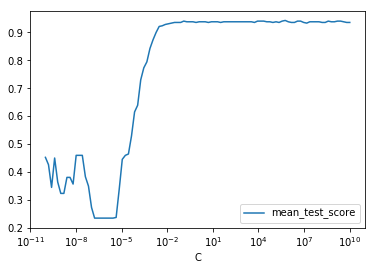

In [19]:
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_test_score'])
plt.legend()
plt.xlabel('C')
plt.show()

I will now pick 10 images from the test set and plot their propabilities

In [20]:
test_dir = os.path.join('swissroads', 'test')
os.listdir(test_dir)

['car', '.DS_Store', 'bike', 'other', 'van', 'motorcycle', 'truck']

In [21]:
test_generator = ImageDataGenerator(rescale = 1/255, horizontal_flip = True, rotation_range = 5)

testset = test_generator.flow_from_directory(
    os.path.join('swissroads','test'), batch_size = 1, target_size = (299,299), shuffle = True)

Found 50 images belonging to 6 classes.


In [22]:
testset.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'other': 3, 'truck': 4, 'van': 5}

In [23]:
len(testset)

50

In [24]:
# pick 10 images randomly from the test set
import random
idx = random.choices(range(0, len(testset)), k=10)
print(idx)

[33, 11, 47, 15, 28, 32, 18, 43, 9, 19]


In [25]:
path = []
for i in idx:
    print(testset.filenames[i])
    #testset.filenames[i].extract('^[a-z]+/([a-z]+-\d{4})')
    path.append(testset.filenames[i])

other/other-0050.png
bike/bike-0111.png
van/van-0040.png
car/car-0100.png
motorcycle/motorcycle-0082.png
other/other-0049.png
car/car-0103.png
truck/truck-0069.png
bike/bike-0109.png
car/car-0104.png


In [26]:
image_path = pd.Series(path)
image_path

0              other/other-0050.png
1                bike/bike-0111.png
2                  van/van-0040.png
3                  car/car-0100.png
4    motorcycle/motorcycle-0082.png
5              other/other-0049.png
6                  car/car-0103.png
7              truck/truck-0069.png
8                bike/bike-0109.png
9                  car/car-0104.png
dtype: object

In [27]:
type(path)

list

In [28]:
item = image_path[1]
item

'bike/bike-0111.png'

In [29]:
names = image_path.str.extract('^[a-z]+/([a-z]+-\d{4})')
names

,0
0,other-0050
1,bike-0111
2,van-0040
3,car-0100
4,motorcycle-0082
5,other-0049
6,car-0103
7,truck-0069
8,bike-0109
9,car-0104


In [30]:
type(names)

pandas.core.frame.DataFrame

to make a dataframe a series

In [31]:
names.squeeze()

0         other-0050
1          bike-0111
2           van-0040
3           car-0100
4    motorcycle-0082
5         other-0049
6           car-0103
7         truck-0069
8          bike-0109
9           car-0104
Name: 0, dtype: object

In [32]:
type(names.squeeze())

pandas.core.series.Series

In [33]:
img_path = (image_path.str.extract('^[a-z]+/([a-z]+-\d{4})', expand = True))
img_names = []
for i in img_path:
    print(img_path[i])
    img_names.append(img_path[i])
img_names = pd.DataFrame(img_names)

0         other-0050
1          bike-0111
2           van-0040
3           car-0100
4    motorcycle-0082
5         other-0049
6           car-0103
7         truck-0069
8          bike-0109
9           car-0104
Name: 0, dtype: object


In [34]:
testset.filenames[:]

['bike/bike-0100.png',
 'bike/bike-0101.png',
 'bike/bike-0102.png',
 'bike/bike-0103.png',
 'bike/bike-0104.png',
 'bike/bike-0105.png',
 'bike/bike-0106.png',
 'bike/bike-0107.png',
 'bike/bike-0108.png',
 'bike/bike-0109.png',
 'bike/bike-0110.png',
 'bike/bike-0111.png',
 'car/car-0097.png',
 'car/car-0098.png',
 'car/car-0099.png',
 'car/car-0100.png',
 'car/car-0101.png',
 'car/car-0102.png',
 'car/car-0103.png',
 'car/car-0104.png',
 'car/car-0105.png',
 'car/car-0106.png',
 'car/car-0107.png',
 'motorcycle/motorcycle-0077.png',
 'motorcycle/motorcycle-0078.png',
 'motorcycle/motorcycle-0079.png',
 'motorcycle/motorcycle-0080.png',
 'motorcycle/motorcycle-0081.png',
 'motorcycle/motorcycle-0082.png',
 'motorcycle/motorcycle-0083.png',
 'motorcycle/motorcycle-0084.png',
 'motorcycle/motorcycle-0085.png',
 'other/other-0049.png',
 'other/other-0050.png',
 'other/other-0051.png',
 'other/other-0052.png',
 'other/other-0053.png',
 'other/other-0054.png',
 'truck/truck-0064.png',
 't

### I would like to discuss this

In [35]:
img_names[2][0]

'van-0040'

In [36]:
img_names[7][0]

'truck-0069'

In [37]:
img_names[3]

0    car-0100
Name: 3, dtype: object

In [38]:
img_names[3][0]

'car-0100'

In [39]:
img_names[3]

0    car-0100
Name: 3, dtype: object

#### why does that not work?

In [40]:
testset.filenames[3]

'bike/bike-0103.png'

In [41]:
testset.filenames[3][0]

'b'

I plot the 10 (pseudo)randomly selected images from the test set.

swissroads/test/other/other-0050.png
swissroads/test/bike/bike-0111.png
swissroads/test/van/van-0040.png
swissroads/test/car/car-0100.png
swissroads/test/motorcycle/motorcycle-0082.png
swissroads/test/other/other-0049.png
swissroads/test/car/car-0103.png
swissroads/test/truck/truck-0069.png
swissroads/test/bike/bike-0109.png
swissroads/test/car/car-0104.png


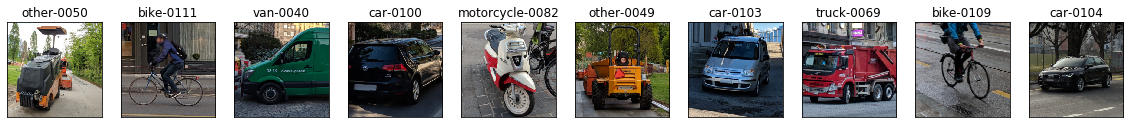

In [42]:
image_list = []
for i in idx:
    # print(testset.filenames[i])
    class_directory = os.path.join(test_dir, testset.filenames[i])
    print(class_directory)
    img = Image.open(class_directory)
    image_list.append(img)

fig, axes = plt.subplots(nrows = 1, ncols = 10, figsize = (20,2))
for i, axis in enumerate(axes):
    image = image_list[i]
    axis.imshow(image)
    axis.title.set_text(img_names[i][0])
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
plt.show()

I make the predictions for these images. this means I calculate the probabilities of each image falling on one of the six categories.

In [43]:
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
sample_proba = []
for i in idx:
    test_sample_prob = grid_cv.predict_proba(X_test[i].reshape(1,-1))
    #print(test_sample_prob)
    flat_sample_prob = [item for sublist in test_sample_prob for item in sublist]
    print(flat_sample_prob)
    sample_proba.append(flat_sample_prob)

[0.00025660322563048364, 0.0030817078775865854, 0.0010920014732380453, 0.07896895533176329, 0.914718561613697, 0.0018821704780846607]
[0.9998514217061786, 6.063489474265856e-06, 5.317536046422938e-06, 0.00013567944332303346, 9.08699544078424e-07, 6.091254336090152e-07]
[0.00012506081776479146, 0.0002510828229059414, 2.387105812607958e-05, 0.00022890458553880496, 0.47660901431031183, 0.5227620664053525]
[2.206679519060239e-05, 0.9997927314318836, 5.1696076585365565e-06, 5.0434108257887435e-05, 3.0584000471988484e-07, 0.00012929221700485469]
[7.085772870023158e-06, 4.146637027779378e-06, 0.9999574594249759, 1.5207262846320928e-05, 1.5026286924999678e-05, 1.074615354942737e-06]
[5.3563258946792814e-06, 2.4363782278704156e-05, 3.1798284806110095e-05, 0.9996996394961449, 0.00023649790705501474, 2.3442038204719077e-06]
[0.0021150369555104492, 0.7974915465612541, 0.0006436119942462852, 0.0045169171047679665, 0.006115070797023964, 0.18911781658719723]
[3.705425194196739e-05, 0.0001882084108915

In [44]:
test_sample_probabilities = pd.DataFrame(sample_proba, columns = class_names)
cols = class_names
test_sample_probabilities

,bike,car,motorcycle,other,truck,van
0,0.000257,0.003082,1.092001e-03,0.078969,9.147186e-01,1.882170e-03
1,0.999851,0.000006,5.317536e-06,0.000136,9.086995e-07,6.091254e-07
2,0.000125,0.000251,2.387106e-05,0.000229,4.766090e-01,5.227621e-01
3,0.000022,0.999793,5.169608e-06,0.000050,3.058400e-07,1.292922e-04
4,0.000007,0.000004,9.999575e-01,0.000015,1.502629e-05,1.074615e-06
5,0.000005,0.000024,3.179828e-05,0.999700,2.364979e-04,2.344204e-06
6,0.002115,0.797492,6.436120e-04,0.004517,6.115071e-03,1.891178e-01
7,0.000037,0.000188,4.734924e-05,0.000275,9.994347e-01,1.757588e-05
8,0.999982,0.000004,7.606250e-07,0.000012,4.535253e-07,5.876220e-07
9,0.000010,0.999635,1.913903e-06,0.000011,2.381532e-07,3.424068e-04


In [45]:
test_sample_probabilities = pd.DataFrame(sample_proba, columns = class_names)
test_sample_probabilities

,bike,car,motorcycle,other,truck,van
0,0.000257,0.003082,1.092001e-03,0.078969,9.147186e-01,1.882170e-03
1,0.999851,0.000006,5.317536e-06,0.000136,9.086995e-07,6.091254e-07
2,0.000125,0.000251,2.387106e-05,0.000229,4.766090e-01,5.227621e-01
3,0.000022,0.999793,5.169608e-06,0.000050,3.058400e-07,1.292922e-04
4,0.000007,0.000004,9.999575e-01,0.000015,1.502629e-05,1.074615e-06
5,0.000005,0.000024,3.179828e-05,0.999700,2.364979e-04,2.344204e-06
6,0.002115,0.797492,6.436120e-04,0.004517,6.115071e-03,1.891178e-01
7,0.000037,0.000188,4.734924e-05,0.000275,9.994347e-01,1.757588e-05
8,0.999982,0.000004,7.606250e-07,0.000012,4.535253e-07,5.876220e-07
9,0.000010,0.999635,1.913903e-06,0.000011,2.381532e-07,3.424068e-04


In [46]:
prob_results = pd.concat([img_names.T, test_sample_probabilities], axis = 1).set_index(0).round(2)
prob_results.index.name = ""
prob_results

,bike,car,motorcycle,other,truck,van
,,,,,,
other-0050,0.0,0.0,0.0,0.08,0.91,0.00
bike-0111,1.0,0.0,0.0,0.00,0.00,0.00
van-0040,0.0,0.0,0.0,0.00,0.48,0.52
car-0100,0.0,1.0,0.0,0.00,0.00,0.00
motorcycle-0082,0.0,0.0,1.0,0.00,0.00,0.00
other-0049,0.0,0.0,0.0,1.00,0.00,0.00
car-0103,0.0,0.8,0.0,0.00,0.01,0.19
truck-0069,0.0,0.0,0.0,0.00,1.00,0.00
bike-0109,1.0,0.0,0.0,0.00,0.00,0.00


In [47]:
prob_results.index.name = ""
prob_results

,bike,car,motorcycle,other,truck,van
,,,,,,
other-0050,0.0,0.0,0.0,0.08,0.91,0.00
bike-0111,1.0,0.0,0.0,0.00,0.00,0.00
van-0040,0.0,0.0,0.0,0.00,0.48,0.52
car-0100,0.0,1.0,0.0,0.00,0.00,0.00
motorcycle-0082,0.0,0.0,1.0,0.00,0.00,0.00
other-0049,0.0,0.0,0.0,1.00,0.00,0.00
car-0103,0.0,0.8,0.0,0.00,0.01,0.19
truck-0069,0.0,0.0,0.0,0.00,1.00,0.00
bike-0109,1.0,0.0,0.0,0.00,0.00,0.00


I observe that the max probability correspond always to the correct class.

## Regularisation strength and class probability

Finally, vary the regularization strength of your estimator. What is the effect on the probabilities? Write your observations in a markdown cell.

I will now vary the regularization strength to see the effect it has on the probabilities. I will investigate three cases:
 -  Case-1: the optimum C=8.111308307896856
 -  Case-2: a low C (high regularization) 
 -  Case-3: a high C (low regularization)

Case-1: the default C

In [48]:
logreg_pipe_me = Pipeline([
    ('scaler', None),
    ('pca', None),
    ('logreg', LogisticRegression( multi_class='multinomial', solver='saga', C=0.0001)) 
                ])
logreg_pipe_me.fit(X_cv, y_cv)
accuracy_me = logreg_pipe_me.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_me))
accuracy_me

Accuracy: 0.640


0.64

In [49]:
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
sample_proba = []
for i in idx:
    test_sample_prob = logreg_pipe_me.predict_proba(X_test[i].reshape(1,-1))
    #print(test_sample_prob)
    flat_sample_prob = [item for sublist in test_sample_prob for item in sublist]
    print(flat_sample_prob)
    sample_proba.append(flat_sample_prob)

[0.20297038397676026, 0.2260085048101272, 0.16127731482124716, 0.13229394187729573, 0.18251462249107328, 0.09493523202349628]
[0.3403604412513321, 0.1910867020143401, 0.15481699493006176, 0.10624406938999369, 0.12842420538967825, 0.07906758702459431]
[0.20422970998168968, 0.22230830236308635, 0.15282482547693835, 0.1229420935439636, 0.19125065651735715, 0.10644441211696481]
[0.2025001335659122, 0.3227410850935933, 0.1485351044510614, 0.10726045711814118, 0.13190678916756599, 0.08705643060372595]
[0.1923629615903574, 0.17852029217555498, 0.3046947476468311, 0.10747263777502704, 0.1353766907569726, 0.08157267005525698]
[0.21052192352426186, 0.21550916360975314, 0.17323211333451924, 0.14316162648071348, 0.16791783174584674, 0.08965734130490564]
[0.20603852310816312, 0.2655193490707041, 0.1602943426867537, 0.113960796834475, 0.1560509882881347, 0.0981360000117693]
[0.2089498595179829, 0.2160868778074368, 0.16651332723047232, 0.12989959581145105, 0.18713275238650387, 0.09141758724615295]
[0

In [50]:
test_sample_probabilities = pd.DataFrame(sample_proba, columns = class_names)
test_sample_probabilities

,bike,car,motorcycle,other,truck,van
0,0.202970,0.226009,0.161277,0.132294,0.182515,0.094935
1,0.340360,0.191087,0.154817,0.106244,0.128424,0.079068
2,0.204230,0.222308,0.152825,0.122942,0.191251,0.106444
3,0.202500,0.322741,0.148535,0.107260,0.131907,0.087056
4,0.192363,0.178520,0.304695,0.107473,0.135377,0.081573
5,0.210522,0.215509,0.173232,0.143162,0.167918,0.089657
6,0.206039,0.265519,0.160294,0.113961,0.156051,0.098136
7,0.208950,0.216087,0.166513,0.129900,0.187133,0.091418
8,0.349603,0.188885,0.151012,0.103409,0.128496,0.078594
9,0.199558,0.325794,0.144364,0.105855,0.134424,0.090005


In [51]:
prob_results_me = pd.concat([img_names.T, test_sample_probabilities], axis = 1).set_index(0).round(2)
prob_results_me.index.name = ""
prob_results_me

,bike,car,motorcycle,other,truck,van
,,,,,,
other-0050,0.20,0.23,0.16,0.13,0.18,0.09
bike-0111,0.34,0.19,0.15,0.11,0.13,0.08
van-0040,0.20,0.22,0.15,0.12,0.19,0.11
car-0100,0.20,0.32,0.15,0.11,0.13,0.09
motorcycle-0082,0.19,0.18,0.30,0.11,0.14,0.08
other-0049,0.21,0.22,0.17,0.14,0.17,0.09
car-0103,0.21,0.27,0.16,0.11,0.16,0.10
truck-0069,0.21,0.22,0.17,0.13,0.19,0.09
bike-0109,0.35,0.19,0.15,0.10,0.13,0.08


In this case the results are not good, no dominant class can be identified.

Case-2: a low C (high regularization)

In [52]:
logreg_pipe_low = Pipeline([
    ('scaler', None),
    ('pca', None),
    ('logreg', LogisticRegression( multi_class='multinomial', solver='saga', C=0.0000001)) 
                ])
logreg_pipe_low.fit(X_cv, y_cv)
accuracy_low = logreg_pipe_low.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_low))
accuracy_low

Accuracy: 0.240


/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.24

In [53]:
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
sample_proba = []
for i in idx:
    test_sample_prob = logreg_pipe_low.predict_proba(X_test[i].reshape(1,-1))
    #print(test_sample_prob)
    flat_sample_prob = [item for sublist in test_sample_prob for item in sublist]
    print(flat_sample_prob)
    sample_proba.append(flat_sample_prob)
    
test_sample_probabilities_low = pd.DataFrame(sample_proba, columns = class_names)
test_sample_probabilities_low

[0.1732442732076821, 0.17260425942468005, 0.16798726344769738, 0.16176008556336657, 0.1650492057256136, 0.15935491263096033]
[0.17336991129471005, 0.17258838476859598, 0.16799353045681492, 0.16172730570528812, 0.16499490450624044, 0.15932596326835052]
[0.17324220547530447, 0.1725989730332235, 0.16797583497727428, 0.16174935751703332, 0.1650578692819284, 0.15937575971523613]
[0.17325263756545173, 0.1726813453556587, 0.1679802568452627, 0.1617342225646732, 0.16500089985075903, 0.15935063781819472]
[0.1732273977785714, 0.1725480923879221, 0.16811936270235678, 0.16174407437216431, 0.16500738626550326, 0.159353686493482]
[0.1732400314839183, 0.1725831561033232, 0.1679995632788234, 0.16178162209179411, 0.1650374919515509, 0.15935813509059008]
[0.1732589469559514, 0.17264616906789446, 0.16799028032661512, 0.16173047891816242, 0.16502154142993014, 0.1593525833014465]
[0.17322868050528126, 0.17257521014976057, 0.16799045678813512, 0.161773693345157, 0.16505915633352564, 0.15937280287814037]
[0.

,bike,car,motorcycle,other,truck,van
0,0.173244,0.172604,0.167987,0.161760,0.165049,0.159355
1,0.173370,0.172588,0.167994,0.161727,0.164995,0.159326
2,0.173242,0.172599,0.167976,0.161749,0.165058,0.159376
3,0.173253,0.172681,0.167980,0.161734,0.165001,0.159351
4,0.173227,0.172548,0.168119,0.161744,0.165007,0.159354
5,0.173240,0.172583,0.168000,0.161782,0.165037,0.159358
6,0.173259,0.172646,0.167990,0.161730,0.165022,0.159353
7,0.173229,0.172575,0.167990,0.161774,0.165059,0.159373
8,0.173366,0.172578,0.167988,0.161731,0.164999,0.159337
9,0.173262,0.172695,0.167977,0.161723,0.165001,0.159342


In [54]:
prob_results_low = pd.concat([img_names.T, test_sample_probabilities_low], axis = 1).set_index(0).round(2)
prob_results_low.index.name = ""
prob_results_low

,bike,car,motorcycle,other,truck,van
,,,,,,
other-0050,0.17,0.17,0.17,0.16,0.17,0.16
bike-0111,0.17,0.17,0.17,0.16,0.16,0.16
van-0040,0.17,0.17,0.17,0.16,0.17,0.16
car-0100,0.17,0.17,0.17,0.16,0.17,0.16
motorcycle-0082,0.17,0.17,0.17,0.16,0.17,0.16
other-0049,0.17,0.17,0.17,0.16,0.17,0.16
car-0103,0.17,0.17,0.17,0.16,0.17,0.16
truck-0069,0.17,0.17,0.17,0.16,0.17,0.16
bike-0109,0.17,0.17,0.17,0.16,0.16,0.16


We see here that the probabilities are almost evenly distributed across the classes and no classification is porssible. It is almost random.

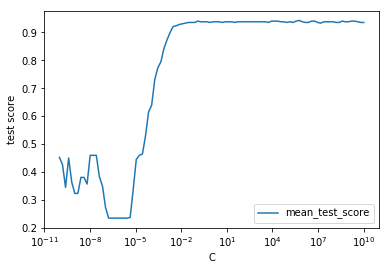

In [55]:
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('test score')
plt.legend()
plt.show()

Case-3: a high C (low regularization)

In [56]:
logreg_pipe_high = Pipeline([
    ('scaler', None),
    ('pca', None),
    ('logreg', LogisticRegression( multi_class='multinomial', solver='saga', C=1000)) 
                ])
logreg_pipe_high.fit(X_cv, y_cv)
accuracy_high = logreg_pipe_high.score(X_test, y_test)

print('Accuracy: {:.3f}'.format(accuracy_high))
accuracy_high

Accuracy: 0.960


/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.96

In [57]:
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']
sample_proba = []
for i in idx:
    test_sample_prob = logreg_pipe_high.predict_proba(X_test[i].reshape(1,-1))
    #print(test_sample_prob)
    flat_sample_prob = [item for sublist in test_sample_prob for item in sublist]
    print(flat_sample_prob)
    sample_proba.append(flat_sample_prob)
    
test_sample_probabilities_high = pd.DataFrame(sample_proba, columns = class_names)
test_sample_probabilities_high

[0.00023410185207662363, 0.0035988412704067293, 0.0011775633693642627, 0.08425602698430486, 0.9087499446275331, 0.0019835218963144014]
[0.999868051737013, 6.990072079793568e-06, 5.13323960939822e-06, 0.00011856775722176524, 7.219141364990683e-07, 5.352799394116368e-07]
[0.00012590792316317083, 0.0003065622600700031, 3.29796073845607e-05, 0.00022958229404773076, 0.4799784154279951, 0.5193265524873395]
[1.947581877221751e-05, 0.9998325313934866, 6.720727190819758e-06, 3.2832627316295935e-05, 1.903781436176384e-07, 0.00010824905509055138]
[1.1450253707746925e-05, 8.097629152927776e-06, 0.9999457461144492, 1.7335020136874555e-05, 1.560708124787214e-05, 1.76390130512864e-06]
[3.643358052782609e-06, 1.9853066342712402e-05, 2.8273842037529887e-05, 0.9997582403145236, 0.00018787054862173021, 2.118870421387911e-06]
[0.0019401027934768556, 0.7694403310055956, 0.0008010517406640141, 0.005727532020304437, 0.006878599185620953, 0.21521238325433822]
[1.4709620160318228e-05, 0.00012182441613474735, 2

,bike,car,motorcycle,other,truck,van
0,0.000234,0.003599,1.177563e-03,0.084256,9.087499e-01,1.983522e-03
1,0.999868,0.000007,5.133240e-06,0.000119,7.219141e-07,5.352799e-07
2,0.000126,0.000307,3.297961e-05,0.000230,4.799784e-01,5.193266e-01
3,0.000019,0.999833,6.720727e-06,0.000033,1.903781e-07,1.082491e-04
4,0.000011,0.000008,9.999457e-01,0.000017,1.560708e-05,1.763901e-06
5,0.000004,0.000020,2.827384e-05,0.999758,1.878705e-04,2.118870e-06
6,0.001940,0.769440,8.010517e-04,0.005728,6.878599e-03,2.152124e-01
7,0.000015,0.000122,2.715221e-05,0.000243,9.995815e-01,1.174523e-05
8,0.999984,0.000005,7.807566e-07,0.000009,3.152313e-07,5.337196e-07
9,0.000010,0.999605,3.263823e-06,0.000009,2.470125e-07,3.724915e-04


In [58]:
prob_results_high = pd.concat([img_names.T, test_sample_probabilities_high], axis = 1).set_index(0).round(2)
prob_results_high.index.name = ""
prob_results_high

,bike,car,motorcycle,other,truck,van
,,,,,,
other-0050,0.0,0.00,0.0,0.08,0.91,0.00
bike-0111,1.0,0.00,0.0,0.00,0.00,0.00
van-0040,0.0,0.00,0.0,0.00,0.48,0.52
car-0100,0.0,1.00,0.0,0.00,0.00,0.00
motorcycle-0082,0.0,0.00,1.0,0.00,0.00,0.00
other-0049,0.0,0.00,0.0,1.00,0.00,0.00
car-0103,0.0,0.77,0.0,0.01,0.01,0.22
truck-0069,0.0,0.00,0.0,0.00,1.00,0.00
bike-0109,1.0,0.00,0.0,0.00,0.00,0.00


Int his case the classification works very well.